In [297]:
# X1(0.1) * W1(0.1) = 0.01

# X2(0.1) * W2(100) = 1.0

# X3(0.1) * W3(0) = 0.0

# 이때, X1~X3는 모두 같지만 가중치가 다름. 이건 X2의 가중치가 제일 큰데 가장 중요하게 생긱한다는 것임.
# X3는 무슨 값이 오든 무시가 되기 때문에 중요하지 않다고 여겨진다는 뜻임.

# 1943 MCP 뉴런
- http://wwwold.ece.utep.edu/research/webfuzzy/docs/kk-thesis/kk-thesis-html/node12.html

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [299]:
x = np.array([0.1, 0.2])
w = np.array([0.3, 0.4])

In [300]:
x * w

array([0.03, 0.08])

In [301]:
# 취합한 값 z, 단일한 스칼라값. 이건 그저 정보 상태임.
z = np.sum(x * w)

In [302]:
# b(bias), 편향
b = 0.3
y = 1 if z > b else -1

In [303]:
y

-1

## MCP 뉴런 논리회로

In [875]:
def gathering(x, w, b):
#     z = np.sum(x * w)
    z = np.sum(x * w) + b
    return z

def activate(z):
#     y = 1 if z > b else 0
    y = 1 if z > 0 else 0
    return y

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) 
    b = -0.7
    # MCP 뉴런
    z = gathering(x, w, b)
    y = activate(z)
    
    return y

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) 
    b = 0.7
    # MCP 뉴런
    z = gathering(x, w, b)
    y = activate(z)
    return y

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) 
    b = -0.2
    # MCP 뉴런
    z = gathering(x, w, b)
    y = activate(z)
    return y

In [876]:
# AND를 증명하기 위한 테스트 로직 구현
def test(logic):
    for x1, x2 in [(0,0), (0,1), (1,0), (1,1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [877]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [878]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [879]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


In [880]:
# 올바른 가중치(w)를 알아서 계산하면 학습능력이 있는데, 없을 경우 전혀 발전이 없다.
# 오류를 계산해서 갱신하여 반영하는 이론이 나옴. 퍼셉트론 1958

# 1958 퍼셉트론

In [881]:
# 가중치의 갱신은 시행착오에 비례한다.

<script type="text/javascript"  src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script>
y     y^    error = y - y^
----------------------------
 1    1         0
 
 1   -1         2
 
 -1    1        -2
 
 -1   -1         0
 

 => 오류: 0 or +-2임. 0이 아닌 것은 오류라고 봄.
 w^ 는 error에 비례한다고 가정    

In [ ]:
# %load perceptron.py
import numpy as np

def gathering(X, w, b):
    z = np.dot(X, w.T) + b
    return z

def activate(z):
    y = np.where(z>0, 1, -1)
    return y

class Neuron:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def predict(self, x):
        z = gathering(x, self.w, self.b)
        y = activate(z)
        return y
    
    
class Perceptron(Neuron):
    def __init__(self):
        super().__init__(w=None, b=None)
        
    def fit(self, X, y, learning_count, learning_rate=0.01):
        # 가중치 초기화, 가중치의 갯수는 X 특징의 갯수
        sample_c, label_c = X.shape
        self.w = np.zeros(label_c)
        self.b = 0.0
        
        error_history = []
        for i in range(learning_count):
            total_error = 0
            for xi, yi in zip(X, y):
                yi_pred = self.predict(xi)
                error = yi - yi_pred
                # 오류를 부각시키기 위해서
                total_error += error**2 
                # 가중치 갱신
                update = error * learning_rate
                self.w += update * xi
                self.b += update * 1
            error_history.append(total_error)
            
        return error_history

In [884]:
ANDNeuron = Neuron(w=np.array([0.5, 0.5]), b=-0.7)

In [885]:
ANDNeuron.w, ANDNeuron.b

(array([0.5, 0.5]), -0.7)

In [886]:
test(lambda x1, x2: ANDNeuron.predict(np.array([x1, x2])))

0 0 | -1
0 1 | -1
1 0 | -1
1 1 | 1


### Perceptron 평가
- 처음 1번 시도할 때는 종합오류는 높은데, 시행을 많이 할 수록 종합오류가 낮아지기를 기대함.

In [887]:
iris = pd.read_csv('data/iris.data', header=None)

print(iris.shape)
iris.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [888]:
data1 = iris[:100]

In [889]:
data1[4].value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

In [890]:
y = data1[4].values
print(y[0:4])

X = data1.iloc[:, 0:4].values.astype('float')
print(X[0:4])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


In [891]:
y = np.where(y == 'Iris-setosa', 1, -1)

In [892]:
np.unique(y)

array([-1,  1])

In [893]:
from sklearn.model_selection import train_test_split

In [894]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [895]:
model = Perceptron()

In [896]:
error_history = model.fit(X_train, y_train, learning_count = 10)

In [897]:
error_history

[36, 0, 0, 0, 0, 0, 0, 0, 0, 0]

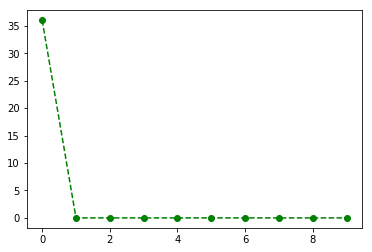

In [898]:
plt.plot(error_history, color='g', marker='o', linestyle='--')

In [899]:
model.w, model.b

(array([ 0.028,  0.146, -0.196, -0.066]), 0.02)

In [900]:
y_pred = model.predict(X_test)

y_pred

array([-1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1])

In [901]:
# 평가
np.mean(y_pred == y_test)

1.0

In [902]:
# 이제 결론은 시행착오를 겪을 수록 오류가 낮아지는 것이 학습이라고 말할 수 있을 것 같음.

### 연습

iris.data의 나머지 두개 분류에 대해 퍼셉트론을 훈련하고 평가해 봅시다.

In [903]:
data2 = iris[50:]

In [904]:
data2[4].value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [905]:
y = data2[4].values
print(y[0:4])

X = data2.iloc[:, 0:4].values.astype('float')
print(X.shape)
print(X[0:4])

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor']
(100, 4)
[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]]


In [906]:
y = np.where(y == 'Iris-versicolor', 1, -1)

In [907]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [908]:
model = Perceptron()

In [909]:
error_history = model.fit(X_train, y_train, learning_count = 10)

In [910]:
error_history

[152, 116, 68, 68, 68, 68, 80, 64, 60, 72]

(0, 150)

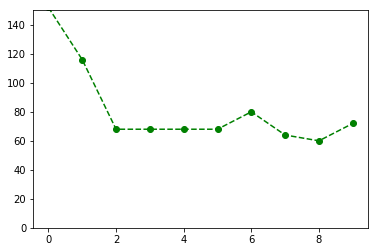

In [911]:
plt.plot(error_history, color='g', marker='o', linestyle='--')

# y축의 limitation을 지정하기
plt.ylim(0, 150)

In [912]:
model.w, model.b

(array([ 0.434,  0.39 , -0.918, -0.612]), 0.23999999999999996)

In [913]:
y_pred = model.predict(X_test)

y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [914]:
# 평가
np.mean(y_pred == y_test)

0.4

In [915]:
# data1의 성적은 좋았는데, data2의 성적은 안 좋았음.
# 왜 이런 결과가 나왔는지 분석하기 위해서 data1, data2의 row data를 보면서 살펴보기로 하자.

In [916]:
data1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


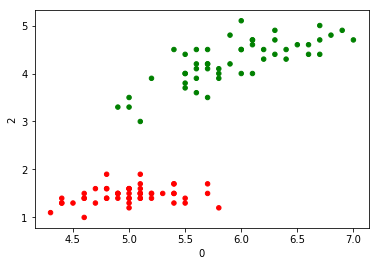

In [917]:
colormap = np.where(data1[4] == 'Iris-setosa', 'r', 'g')
data1.plot(kind='scatter', x=0, y=2, c=colormap)

In [918]:
# 퍼셉트론은 2차원 선형모델에 대해서 잘 측정할 수 있다.

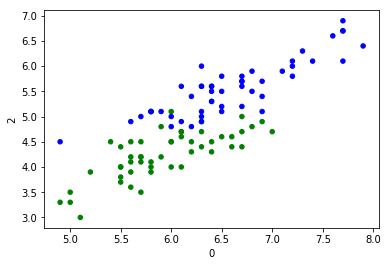

In [919]:
colormap = np.where(data2[4] == 'Iris-versicolor', 'g', 'b')
data2.plot(kind='scatter', x=0, y=2, c=colormap)

In [920]:
# data2는 data1보다 완벽한 선형모델을 만들기 힘들다는 것이 눈에 보임. 비선형적인 문제가 있음을 확인할 수 있음.
# 단점은 상세하게 어떤 면에서 틀렸다고 알려주지 않고, 그저 틀렸다고만 얘기해주기 때문에 어느 방향으로 가야 할 지 알 수가 없음.
# 따라서, 아무 방향으로 시도를 하게 됨. 이 시도가 더 나아지는 방향인지 아닌지 알지 못한 상태로 그저 진행하게 되는 단점이 있음.
# 계단함수를 쓰는 대신에 S자 곡선(Sigmoid)의 활성화 함수를 사용하게 됨.
# 개선의 방향은 Active 함수를 개선하는 방향으로 갔음.

In [921]:
from sklearn.linear_model import LogisticRegression

In [922]:
y = data2[4]
X = data2.iloc[:, 0:4]

In [923]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [924]:
print(data2.shape)

X_test.shape

(100, 5)


(25, 4)

In [925]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.mean(y_pred == y_test)

1.0

In [926]:
# XOR는 선형적인 문제로 해결할 수 없게 됨.

In [927]:
predict_probability = model.predict_proba(X_test)

In [928]:
pd.DataFrame(predict_probability)

,0,1
0,0.780293,0.219707
1,0.118663,0.881337
2,0.249525,0.750475
3,0.407990,0.592010
4,0.166011,0.833989
5,0.460801,0.539199
6,0.657844,0.342156
7,0.157435,0.842565
8,0.759580,0.240420
9,0.896879,0.103121


In [929]:
y = iris[4]
X = iris.iloc[:, 0:4]

In [930]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [931]:
logreg = LogisticRegression().fit(X_train, y_train)

predict_probability = logreg.predict_proba(X_test)
pd.DataFrame(predict_probability, columns = np.unique(y))

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.136093,0.713648,0.150259
1,0.929307,0.070679,0.000014
2,0.901837,0.098019,0.000144
3,0.000373,0.364627,0.635000
4,0.064816,0.696520,0.238664
5,0.873278,0.126617,0.000105
6,0.834664,0.165291,0.000045
7,0.868480,0.131506,0.000014
8,0.054864,0.800649,0.144487
9,0.050521,0.688280,0.261199


In [932]:
X_test.shape

(38, 4)

In [933]:
def step(x):
    return np.where(x > 0, 1, -1)

In [934]:
x = np.arange(-5, 5, 0.1)

In [935]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [936]:
def relu(x):
    return np.maximum(0, x)

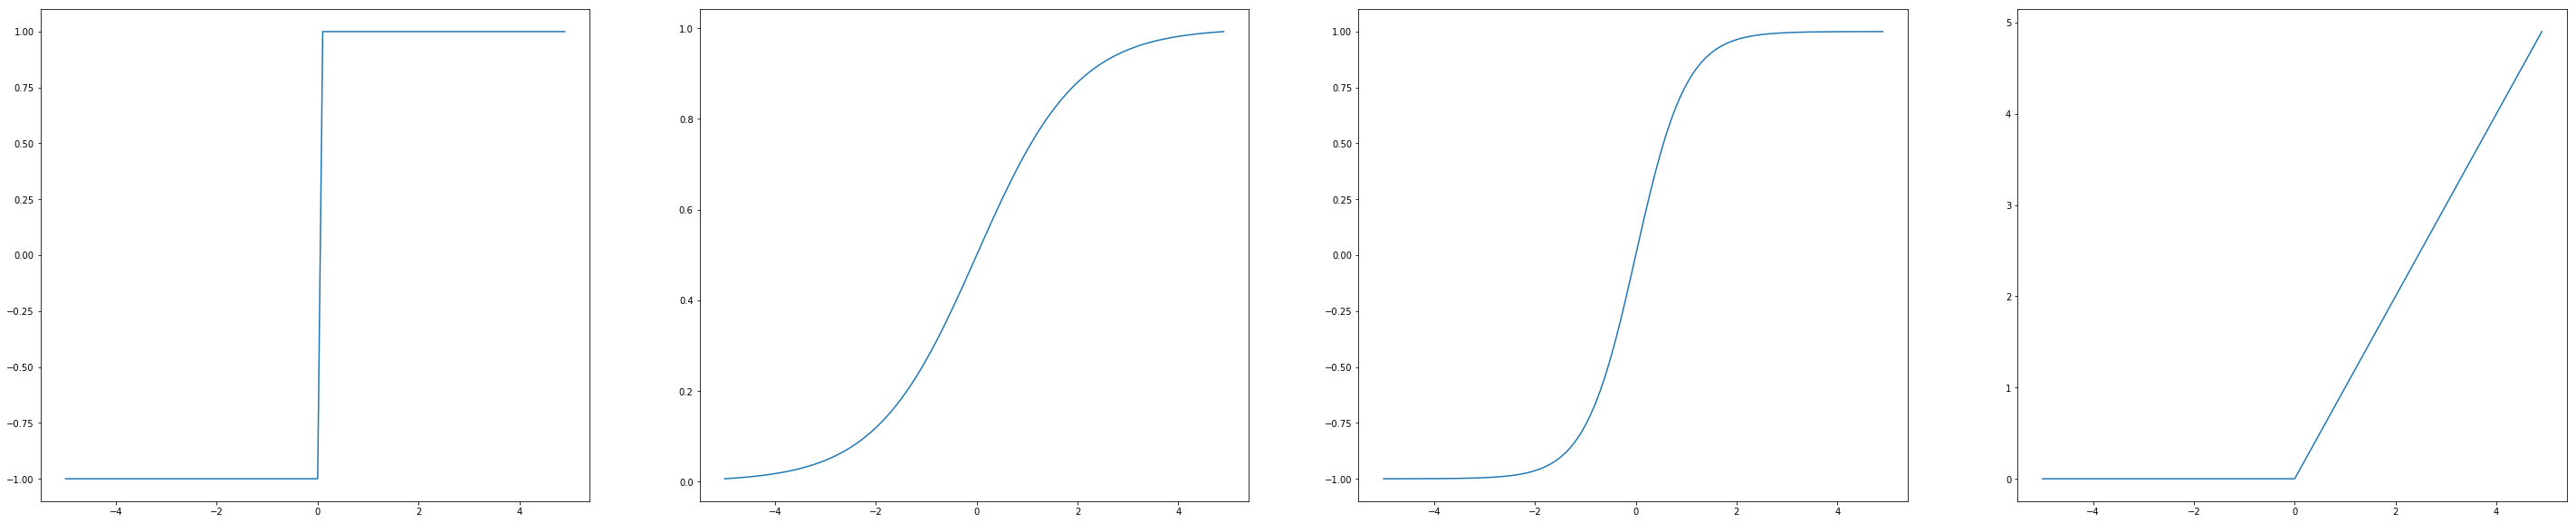

In [937]:
fig, axes = plt.subplots(1, 4, figsize=(50, 10))


axes[0].plot(x, step(x))
axes[1].plot(x, sigmoid(x))
axes[2].plot(x, np.tanh(x)) # 잘 사용하는 활성화함수. 계단함수와 유사한 형태임.
axes[3].plot(x, relu(x))

# 신경망 순전파

- 입력으로부터 출력이 전달되는 것을 순전파(feed forward)라고 함.

In [938]:
x = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])

# 출력 neuron 갯수만큼 생겨야 함.
b1 = np.array([0.1, 0.2, 0.3])

In [939]:
z1 = np.dot(x, W1) + b1
z1

array([0.3, 0.7, 1.1])

In [940]:
a1 = sigmoid(z1)
a1

array([0.57444252, 0.66818777, 0.75026011])

In [941]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
b2 = np.array([0.1, 0.2])

In [942]:
z2 = np.dot(a1, W2) + b2
z2

array([0.51615984, 1.21402696])

In [943]:
a2 = sigmoid(z2)
a2

array([0.62624937, 0.7710107 ])

In [944]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
b3 = np.array([0.1, 0.2])

In [945]:
z3 = np.dot(a2, W3) + b3
print(z3)

np.sum(z3)

[0.31682708 0.69627909]


1.0131061662729968

In [946]:
# 이 문제는 분류의 해당함. 각 분류의 가능성은 확률로 표현할 수 있고, 전체 sum은 1이 됨.
# sigmoid는 이진분류의 경우에는 마지막 출력처리도 처리할 수는 있지만, 다중분류에 대해서는 sigmoid가 전체 sum을 1로 만들어주지 못 해서 softmax를 사용함.
# but 회귀는 1개의 결과값만 나오게 됨. 따라서 최종 값이 y가 될 수 있음.

## 출력처리

###  Softmax

In [947]:
# 음수값이 들어가도 총합은 1을 유지하면서 probability를 산출함.
# 단순하게 전체 sum을 분모로 나눌 경우, 음수값이 들어가면 틀어지는 문제가 됨.
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [948]:
a = np.array([-0.3, 2.9, 4.0])
y = softmax(a)
print(y)

np.sum(y)

[0.01007736 0.24722318 0.74269946]


1.0

### 손글씨 숫자 인식

In [986]:
from deepy.dataset import mnist

In [950]:
(X_train, y_train), (X_test, y_test) = mnist.load_mnist(flatten=False, normalize=False)

In [951]:
X_train.shape

(60000, 1, 28, 28)

In [952]:
x1 = X_train[0]
x1 = x1.reshape(28, 28)
x1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


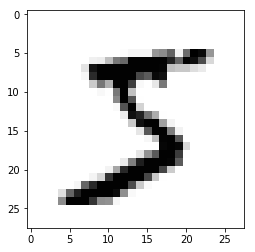

In [953]:
plt.imshow(x1, 'Greys')

print(y_train[0])

In [954]:
y_train[0]

5

#### 각 샘플을 벡터로 만들기

In [955]:
X_train = X_train.reshape(60000, 1*28*28) # X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(10000, 1*28*28) # X_test.reshape(-1, 1*28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [956]:
print(y_train[:10])
y_train


[5 0 4 1 9 2 1 3 1 4]


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### one-hot encoding

In [957]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

print(Y_train, Y_test)
print(Y_train.shape, Y_test.shape)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]] [[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000, 10) (10000, 10)


# 신경망 구성

In [972]:
class Layer:
    def __init__(self, input, output, activate):
        # 신경망에서는 초기값은 0으로 하면 안됨. perceptron은 초기값을 0으로 해도 됨.
        self.W = np.random.randn(input, output)
        self.b = np.random.randn(output)
        self.activate = activate
        
    def forward(self, X):
        z = np.dot(X, self.W) + self.b
        a = self.activate(z)
        return a

class FeedForwardNet:
    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def predict(self, X):
        layer_output = X
        for layer in self.layers:
            layer_output = layer.forward(layer_output)
        y = layer_output
        return y
    
    def fit(self, X, y):
        # TODO
        pass

In [973]:
layer1 = Layer(784, 50, sigmoid)
layer2 = Layer(50, 100, sigmoid)
# layer3 = Layer(100, 10, softmax)
layer3 = Layer(100, 10, lambda x: x)

In [974]:
model = FeedForwardNet()
model.add(layer1)
model.add(layer2)
model.add(layer3)

In [975]:
model.layers[0].W.shape

(784, 50)

#### 기훈련된 가충치 탑재

In [976]:
import pickle

In [977]:
with open('data/mnist_weight.pkl', 'rb') as file:
    params = pickle.load(file)
    
params

{'W1': array([[-0.00741249, -0.00790439, -0.01307499, ...,  0.01978721,
         -0.04331266, -0.01350104],
        [-0.01029745, -0.01616653, -0.01228376, ...,  0.01920228,
          0.02809811,  0.01450908],
        [-0.01309184, -0.00244747, -0.0177224 , ...,  0.00944778,
          0.01387301,  0.03393568],
        ...,
        [ 0.02242565, -0.0296145 , -0.06326169, ..., -0.01012643,
          0.01120969,  0.01027199],
        [-0.00761533,  0.02028973, -0.01498873, ...,  0.02735376,
         -0.01229855,  0.02407041],
        [ 0.00027915, -0.06848375,  0.00911191, ..., -0.03183098,
          0.00743086, -0.04021148]], dtype=float32),
 'W2': array([[-0.10694039,  0.01591247, -0.44349867, ...,  0.03561032,
          0.14045963,  0.03964241],
        [ 0.29911557, -0.03322235, -0.08902215, ..., -0.04722451,
         -0.0972147 ,  0.2950258 ],
        [ 0.06576645,  0.6330455 ,  0.02325344, ...,  0.05046809,
          0.26831996, -0.13252524],
        ...,
        [-0.1839421 , -0.10

In [987]:
model.layers[0].W = params['W1']
model.layers[0].b = params['b1']
model.layers[1].W = params['W2']
model.layers[1].b = params['b2']
model.layers[2].W = params['W3']
model.layers[2].b = params['b3']

In [988]:
(X_train, y_train), (X_test, y_test) = mnist.load_mnist(flatten=False, normalize=False)

In [989]:
X_train = X_train.reshape(-1, 1*28*28)
X_test = X_test.reshape(-1, 1*28*28)

In [990]:
Y_train = pd.get_dummies(y_train).values
Y_test = pd.get_dummies(y_test).values

In [991]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### 데이터 크기 조정(scaling)
- 퍼셉트론 모델에서는 공유하는 특정임.

In [992]:
X_train /= 255.0
X_test /= 255.0

In [993]:
X_test.min(), X_test.max()

(0.0, 1.0)

In [994]:
Y_pred = model.predict(X_test)

In [995]:
Y_pred.shape

(10000, 10)

In [996]:
y_pred = np.argmax(Y_pred, axis=1)

In [997]:
y_pred[:5]

array([7, 2, 1, 0, 4])

In [998]:
np.mean(y_pred == y_test)

0.9352